In [1]:
import sklearn
import pandas as pd
    

In [2]:
fdf=pd.read_csv(r'C:\Users\user\Desktop\Varsha\\processed_training.csv')

In [3]:
fdf.head()

,Major code stored as workover/drilling,Cde,Service hours type,Minor Repair / Tripping / Complication,Service hours type_lowercase
0,RDRP,1A,RIG CARRIER MOVED TO NEW SITE,NaN,rig carrier moved to new site
1,OUC,24J,DWS UNDER MAJOR REPAIR & WAITG FOR COMP OF CIV...,NaN,dws under major repair waitg for comp of civ job
2,OUC,24J,DWS UNDER MAJOR REPAIR & WAITG FOR COMP OF CIV...,NaN,dws under major repair waitg for comp of civ job
3,OUC,24J,DWS UNDER MAJOR REPAIR & WAITG FOR COMP OF CIV...,NaN,dws under major repair waitg for comp of civ job
4,OUC,24J,DWS UNDER MAJOR REPAIR & WAITG FOR COMP OF CIV...,NaN,dws under major repair waitg for comp of civ job


In [4]:
fdf.shape

(291489, 5)

In [5]:
fdf.columns

Index(['Major code stored  as  workover/drilling', 'Cde', 'Service hours type',
       'Minor Repair / Tripping / Complication',
       'Service hours type_lowercase'],
      dtype='object')

In [6]:
fdf['Cde'].value_counts()

Cde
6A     67930
5A     38754
2A     22671
23A    13612
11A    13301
       ...  
23I       76
7B        70
11B       56
24K       45
21J       10
Name: count, Length: 73, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()

In [9]:
fdf.loc[:, 'label_encoded'] = le.fit_transform(fdf['Cde'])

In [10]:
fdf.columns

Index(['Major code stored  as  workover/drilling', 'Cde', 'Service hours type',
       'Minor Repair / Tripping / Complication',
       'Service hours type_lowercase', 'label_encoded'],
      dtype='object')

In [11]:
from sklearn.model_selection import train_test_split


X = fdf.drop(columns=['label_encoded'])  # Features
y = fdf['label_encoded']  # Target

# Perform stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,  # 30% test set
    stratify=y,     # Ensure class distribution is preserved
    random_state=42
)

# Combine features and target back into DataFrames
train_df = X_train.copy()
train_df['label_encoded'] = y_train

test_df = X_test.copy()
test_df['label_encoded'] = y_test


In [12]:
# Verify class distribution
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))


label_encoded
65    0.233045
64    0.132953
59    0.077778
41    0.046696
1     0.045633
        ...   
49    0.000260
67    0.000240
2     0.000191
58    0.000157
29    0.000034
Name: proportion, Length: 73, dtype: float64
label_encoded
65    0.233044
64    0.132949
59    0.077773
41    0.046703
1     0.045628
        ...   
49    0.000263
67    0.000240
2     0.000194
58    0.000149
29    0.000034
Name: proportion, Length: 73, dtype: float64


In [23]:
!pip install ipywidgets --upgrade
!jupyter nbextension enable --py widgetsnbextension

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: console contrib dejavu events execute kernel kernelspec
lab labextension labhub migrate nbconvert nbextensions_configurator notebook
qtconsole run script server troubleshoot trust

Jupyter command `jupyter-nbextension` not found.


In [24]:
!pip install jupyter-contrib-nbextensions


In [25]:
!jupyter contrib nbextension install --user


Traceback (most recent call last):
  File "D:\hehe\envs\pytorch\Lib\site-packages\jupyter_contrib_core\notebook_compat\nbextensions.py", line 6, in <module>
    from notebook.extensions import BaseExtensionApp
ModuleNotFoundError: No module named 'notebook.extensions'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\hehe\envs\pytorch\Lib\site-packages\jupyter_contrib_core\notebook_compat\nbextensions.py", line 10, in <module>
    from notebook.nbextensions import BaseNBExtensionApp
ModuleNotFoundError: No module named 'notebook.nbextensions'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "D:\hehe\envs\pytorch\Scripts\jupyter-contrib.EXE\__main__.py", line 7, in <module>
  File "D:\hehe\envs\pytorch\Lib\site-packages\jupyter_core\application.py", line 28

In [14]:
from transformers import DistilBertTokenizer

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
tokens = tokenizer('Service hours type_lowercase')
print(tokens)


{'input_ids': [101, 2326, 2847, 2828, 1035, 2896, 18382, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}


In [15]:
print(train_df['Service hours type_lowercase'].isnull().sum())
print(test_df['Service hours type_lowercase'].isnull().sum())


49
17


In [16]:
# Drop null values from the 'Service hours type_lowercase' column
train_df = train_df.dropna(subset=['Service hours type_lowercase'])
test_df = test_df.dropna(subset=['Service hours type_lowercase'])

# Now you can tokenize the data
train_encodings = tokenizer(list(train_df['Service hours type_lowercase']), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(test_df['Service hours type_lowercase']), truncation=True, padding=True, max_length=128)


In [18]:
import torch
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create PyTorch datasets
train_dataset = CustomDataset(train_encodings, list(train_df['label_encoded']))
test_dataset = CustomDataset(test_encodings, list(test_df['label_encoded']))

# Number of labels
num_labels = len(train_df['label_encoded'].unique())

In [19]:
num_labels

73

In [20]:
num_labels_test=len(test_df['label_encoded'].unique())
num_labels_test

73

In [21]:
train_df.shape

(203993, 6)

In [22]:
test_df.shape

(87430, 6)

In [23]:
print(len(train_dataset))
print(len(test_dataset))


203993
87430


In [24]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())


Major code stored  as  workover/drilling         0
Cde                                              0
Service hours type                               0
Minor Repair / Tripping / Complication      140709
Service hours type_lowercase                     0
label_encoded                                    0
dtype: int64
Major code stored  as  workover/drilling        0
Cde                                             0
Service hours type                              0
Minor Repair / Tripping / Complication      60461
Service hours type_lowercase                    0
label_encoded                                   0
dtype: int64


In [85]:
pip install --upgrade transformers accelerate


In [25]:
print(len(train_encodings['input_ids']), len(train_dataset))
print(len(test_encodings['input_ids']), len(test_dataset))


203993 203993
87430 87430


In [26]:
print(train_df['label_encoded'].value_counts())
print(test_df['label_encoded'].value_counts())


label_encoded
65    47545
64    27120
59    15868
41     9528
1      9306
      ...  
49       53
67       49
2        39
58       32
29        7
Name: count, Length: 73, dtype: int64
label_encoded
65    20372
64    11624
59     6801
41     4084
1      3990
      ...  
49       23
67       21
2        17
58       13
29        3
Name: count, Length: 73, dtype: int64


In [27]:
from sklearn.metrics import accuracy_score
import numpy as np

def compute_metrics(p):
    predictions = np.argmax(p.predictions, axis=1)
    accuracy = accuracy_score(p.label_ids, predictions)
    return {
        'accuracy': accuracy,
    }


In [29]:
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, AdamW


In [30]:
class BalancedCrossEntropyLoss(torch.nn.Module):
    def __init__(self, class_weights):
        super(BalancedCrossEntropyLoss, self).__init__()
        self.class_weights = class_weights

    def forward(self, inputs, targets):
        return F.cross_entropy(inputs, targets, weight=self.class_weights)

In [32]:
model_name = 'distilbert-base-uncased'
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [33]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [37]:
def compute_class_weights(dataset):
    class_counts = [0] * num_labels
    for sample in dataset:
        class_counts[sample['labels']] += 1
    total_samples = sum(class_counts)
    class_weights = [total_samples / count for count in class_counts]
    return torch.FloatTensor(class_weights).to(device)

class_weights = compute_class_weights(train_dataset)
criterion = BalancedCrossEntropyLoss(class_weights)

In [36]:
print(train_dataset[0])

{'input_ids': tensor([  101,  9530,  2102,  2094, 13433, 13433, 11631,  1052, 21638,  2007,
        24709, 26419,  2290, 25510,  2078,  1038,  3270,   102,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0]), 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0]), 'labels': tensor(65)}


In [38]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

D:\hehe\envs\pytorch\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [39]:
epoch_losses = []
epoch_accuracies = []

num_epochs = 30
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    total_loss = 0
    correct_predictions = 0
    total_samples = 0
    
    for batch in tqdm(train_loader, desc=f"Training Epoch {epoch + 1}"):
        optimizer.zero_grad()  # Zero the gradients
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        
        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        
        # Compute loss
        loss = criterion(logits, labels)
        
        # Backward pass
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        
        # Calculate accuracy
        predictions = torch.argmax(logits, dim=1)
        correct_predictions += (predictions == labels).sum().item()
        total_samples += labels.size(0)
    
    # Calculate average loss and accuracy for the epoch
    avg_loss = total_loss / len(train_loader)
    accuracy = correct_predictions / total_samples
    
    epoch_losses.append(avg_loss)
    epoch_accuracies.append(accuracy)
    
    print(f"Epoch {epoch + 1}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")


Training Epoch 1: 100%|██████████| 12750/12750 [08:43<00:00, 24.34it/s]


Epoch 1, Loss: 1.7593, Accuracy: 0.6767


Training Epoch 2: 100%|██████████| 12750/12750 [08:40<00:00, 24.51it/s]


Epoch 2, Loss: 1.2205, Accuracy: 0.7301


Training Epoch 3: 100%|██████████| 12750/12750 [08:33<00:00, 24.81it/s]


Epoch 3, Loss: 1.0426, Accuracy: 0.7445


Training Epoch 4: 100%|██████████| 12750/12750 [08:31<00:00, 24.92it/s]


Epoch 4, Loss: 0.9019, Accuracy: 0.7536


Training Epoch 5: 100%|██████████| 12750/12750 [08:28<00:00, 25.06it/s]


Epoch 5, Loss: 0.8082, Accuracy: 0.7632


Training Epoch 6: 100%|██████████| 12750/12750 [08:30<00:00, 24.97it/s]


Epoch 6, Loss: 0.7390, Accuracy: 0.7683


Training Epoch 7: 100%|██████████| 12750/12750 [08:27<00:00, 25.13it/s]


Epoch 7, Loss: 0.6725, Accuracy: 0.7776


Training Epoch 8: 100%|██████████| 12750/12750 [08:31<00:00, 24.91it/s]


Epoch 8, Loss: 0.6269, Accuracy: 0.7843


Training Epoch 9: 100%|██████████| 12750/12750 [08:32<00:00, 24.86it/s]


Epoch 9, Loss: 0.5867, Accuracy: 0.7914


Training Epoch 10: 100%|██████████| 12750/12750 [08:30<00:00, 24.99it/s]


Epoch 10, Loss: 0.5485, Accuracy: 0.7969


Training Epoch 11: 100%|██████████| 12750/12750 [08:30<00:00, 24.96it/s]


Epoch 11, Loss: 0.5254, Accuracy: 0.8018


Training Epoch 12: 100%|██████████| 12750/12750 [08:30<00:00, 24.96it/s]


Epoch 12, Loss: 0.4950, Accuracy: 0.8081


Training Epoch 13: 100%|██████████| 12750/12750 [08:31<00:00, 24.92it/s]


Epoch 13, Loss: 0.4854, Accuracy: 0.8117


Training Epoch 14: 100%|██████████| 12750/12750 [08:30<00:00, 24.97it/s]


Epoch 14, Loss: 0.4649, Accuracy: 0.8132


Training Epoch 15: 100%|██████████| 12750/12750 [08:46<00:00, 24.23it/s]


Epoch 15, Loss: 0.4460, Accuracy: 0.8179


Training Epoch 16: 100%|██████████| 12750/12750 [08:41<00:00, 24.43it/s]


Epoch 16, Loss: 0.4270, Accuracy: 0.8209


Training Epoch 17: 100%|██████████| 12750/12750 [08:43<00:00, 24.36it/s]


Epoch 17, Loss: 0.4267, Accuracy: 0.8216


Training Epoch 18: 100%|██████████| 12750/12750 [08:41<00:00, 24.43it/s]


Epoch 18, Loss: 0.4071, Accuracy: 0.8251


Training Epoch 19: 100%|██████████| 12750/12750 [08:42<00:00, 24.42it/s]


Epoch 19, Loss: 0.4017, Accuracy: 0.8293


Training Epoch 20: 100%|██████████| 12750/12750 [08:42<00:00, 24.38it/s]


Epoch 20, Loss: 0.3846, Accuracy: 0.8321


Training Epoch 21: 100%|██████████| 12750/12750 [08:43<00:00, 24.34it/s]


Epoch 21, Loss: 0.3803, Accuracy: 0.8374


Training Epoch 22: 100%|██████████| 12750/12750 [08:43<00:00, 24.37it/s]


Epoch 22, Loss: 0.3716, Accuracy: 0.8384


Training Epoch 23: 100%|██████████| 12750/12750 [08:46<00:00, 24.21it/s]


Epoch 23, Loss: 0.3706, Accuracy: 0.8390


Training Epoch 24: 100%|██████████| 12750/12750 [08:42<00:00, 24.41it/s]


Epoch 24, Loss: 0.3590, Accuracy: 0.8416


Training Epoch 25: 100%|██████████| 12750/12750 [08:35<00:00, 24.73it/s]


Epoch 25, Loss: 0.3599, Accuracy: 0.8420


Training Epoch 26: 100%|██████████| 12750/12750 [08:41<00:00, 24.43it/s]


Epoch 26, Loss: 0.3511, Accuracy: 0.8470


Training Epoch 27: 100%|██████████| 12750/12750 [08:43<00:00, 24.36it/s]


Epoch 27, Loss: 0.3447, Accuracy: 0.8482


Training Epoch 28: 100%|██████████| 12750/12750 [08:43<00:00, 24.34it/s]


Epoch 28, Loss: 0.3396, Accuracy: 0.8497


Training Epoch 29: 100%|██████████| 12750/12750 [08:42<00:00, 24.40it/s]


Epoch 29, Loss: 0.3374, Accuracy: 0.8499


Training Epoch 30: 100%|██████████| 12750/12750 [08:44<00:00, 24.33it/s]

Epoch 30, Loss: 0.3374, Accuracy: 0.8526


In [40]:
#save model!!!
# Define the path to save the model
model_save_path = r"C:\Users\user\Desktop\Varsha\model_feedbackloop_balancedcel.pth"

# Save the model state dictionary
torch.save(model.state_dict(), model_save_path)

print(f"Model saved at: {model_save_path}")


Model saved at: C:\Users\user\Desktop\Varsha\model_feedbackloop_balancedcel.pth


In [42]:
for epoch in range(31, 61):
    model.train()  # Set the model to training mode
    total_loss = 0
    correct_predictions = 0
    total_samples = 0
    
    for batch in tqdm(train_loader, desc=f"Training Epoch {epoch + 1}"):
        optimizer.zero_grad()  # Zero the gradients
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        
        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        
        # Compute loss
        loss = criterion(logits, labels)
        
        # Backward pass
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        
        # Calculate accuracy
        predictions = torch.argmax(logits, dim=1)
        correct_predictions += (predictions == labels).sum().item()
        total_samples += labels.size(0)
    
    # Calculate average loss and accuracy for the epoch
    avg_loss = total_loss / len(train_loader)
    accuracy = correct_predictions / total_samples
    
    epoch_losses.append(avg_loss)
    epoch_accuracies.append(accuracy)
    
    print(f"Epoch {epoch + 1}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")


Training Epoch 32: 100%|██████████| 12750/12750 [08:44<00:00, 24.33it/s]


Epoch 32, Loss: 0.3319, Accuracy: 0.8541


Training Epoch 33: 100%|██████████| 12750/12750 [08:43<00:00, 24.34it/s]


Epoch 33, Loss: 0.3246, Accuracy: 0.8558


Training Epoch 34: 100%|██████████| 12750/12750 [08:44<00:00, 24.32it/s]


Epoch 34, Loss: 0.3277, Accuracy: 0.8548


Training Epoch 35: 100%|██████████| 12750/12750 [08:45<00:00, 24.24it/s]


Epoch 35, Loss: 0.3165, Accuracy: 0.8586


Training Epoch 36: 100%|██████████| 12750/12750 [08:45<00:00, 24.27it/s]


Epoch 36, Loss: 0.3274, Accuracy: 0.8587


Training Epoch 37: 100%|██████████| 12750/12750 [08:45<00:00, 24.27it/s]


Epoch 37, Loss: 0.3183, Accuracy: 0.8579


Training Epoch 38: 100%|██████████| 12750/12750 [08:39<00:00, 24.56it/s]


Epoch 38, Loss: 0.3112, Accuracy: 0.8622


Training Epoch 39: 100%|██████████| 12750/12750 [08:32<00:00, 24.88it/s]


Epoch 39, Loss: 0.3171, Accuracy: 0.8610


Training Epoch 40: 100%|██████████| 12750/12750 [08:32<00:00, 24.88it/s]


Epoch 40, Loss: 0.3086, Accuracy: 0.8654


Training Epoch 41: 100%|██████████| 12750/12750 [08:29<00:00, 25.00it/s]


Epoch 41, Loss: 0.3110, Accuracy: 0.8629


Training Epoch 42: 100%|██████████| 12750/12750 [08:29<00:00, 25.01it/s]


Epoch 42, Loss: 0.3068, Accuracy: 0.8634


Training Epoch 43: 100%|██████████| 12750/12750 [08:31<00:00, 24.93it/s]


Epoch 43, Loss: 0.3051, Accuracy: 0.8666


Training Epoch 44: 100%|██████████| 12750/12750 [08:32<00:00, 24.89it/s]


Epoch 44, Loss: 0.3027, Accuracy: 0.8654


Training Epoch 45: 100%|██████████| 12750/12750 [08:28<00:00, 25.09it/s]


Epoch 45, Loss: 0.2997, Accuracy: 0.8689


Training Epoch 46: 100%|██████████| 12750/12750 [08:29<00:00, 25.01it/s]


Epoch 46, Loss: 0.3021, Accuracy: 0.8699


Training Epoch 47: 100%|██████████| 12750/12750 [08:28<00:00, 25.10it/s]


Epoch 47, Loss: 0.2915, Accuracy: 0.8700


Training Epoch 48: 100%|██████████| 12750/12750 [08:30<00:00, 24.98it/s]


Epoch 48, Loss: 0.2975, Accuracy: 0.8683


Training Epoch 49: 100%|██████████| 12750/12750 [08:32<00:00, 24.89it/s]


Epoch 49, Loss: 0.3013, Accuracy: 0.8714


Training Epoch 50: 100%|██████████| 12750/12750 [08:33<00:00, 24.82it/s]


Epoch 50, Loss: 0.2886, Accuracy: 0.8723


Training Epoch 51: 100%|██████████| 12750/12750 [08:31<00:00, 24.91it/s]


Epoch 51, Loss: 0.2964, Accuracy: 0.8691


Training Epoch 52: 100%|██████████| 12750/12750 [08:28<00:00, 25.06it/s]


Epoch 52, Loss: 0.2882, Accuracy: 0.8695


Training Epoch 53: 100%|██████████| 12750/12750 [08:28<00:00, 25.06it/s]


Epoch 53, Loss: 0.2957, Accuracy: 0.8738


Training Epoch 54: 100%|██████████| 12750/12750 [08:29<00:00, 25.00it/s]


Epoch 54, Loss: 0.2934, Accuracy: 0.8732


Training Epoch 55: 100%|██████████| 12750/12750 [08:28<00:00, 25.05it/s]


Epoch 55, Loss: 0.3027, Accuracy: 0.8735


Training Epoch 56: 100%|██████████| 12750/12750 [08:29<00:00, 25.04it/s]


Epoch 56, Loss: 0.2892, Accuracy: 0.8732


Training Epoch 57: 100%|██████████| 12750/12750 [08:34<00:00, 24.79it/s]


Epoch 57, Loss: 0.2799, Accuracy: 0.8763


Training Epoch 58: 100%|██████████| 12750/12750 [08:37<00:00, 24.62it/s]


Epoch 58, Loss: 0.2888, Accuracy: 0.8746


Training Epoch 59: 100%|██████████| 12750/12750 [08:40<00:00, 24.49it/s]


Epoch 59, Loss: 0.2897, Accuracy: 0.8749


Training Epoch 60: 100%|██████████| 12750/12750 [08:41<00:00, 24.46it/s]


Epoch 60, Loss: 0.2878, Accuracy: 0.8748


Training Epoch 61: 100%|██████████| 12750/12750 [08:40<00:00, 24.52it/s]

Epoch 61, Loss: 0.2789, Accuracy: 0.8784


In [43]:
#save model!!!
# Define the path to save the model
model_save_path = r"C:\Users\user\Desktop\Varsha\model_feedbackloop_balancedcel.pth"

# Save the model state dictionary
torch.save(model.state_dict(), model_save_path)

print(f"Model saved at: {model_save_path}")


Model saved at: C:\Users\user\Desktop\Varsha\model_feedbackloop_balancedcel.pth


In [44]:
# Set the model to evaluation mode
model.eval()  
total_correct = 0
total_samples = 0

# Initialize lists to store predictions and labels for metrics if needed
all_predictions = []
all_labels = []

# Disable gradient calculation
with torch.no_grad():
    for batch in tqdm(test_loader, desc="Evaluating"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        
        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        
        # Get predictions
        predictions = torch.argmax(logits, dim=1)
        
        # Store predictions and labels
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        
        # Count correct predictions
        total_correct += (predictions == labels).sum().item()
        total_samples += labels.size(0)

# Calculate accuracy
accuracy = total_correct / total_samples
print(f"Test Accuracy: {accuracy:.4f}")

# Optional: If you want to compute and print other metrics like F1 score
from sklearn.metrics import classification_report

print(classification_report(all_labels, all_predictions))


Evaluating: 100%|██████████| 5465/5465 [01:01<00:00, 88.44it/s]


Test Accuracy: 0.7570
              precision    recall  f1-score   support

           0       0.66      0.85      0.74       487
           1       0.84      0.81      0.82      3990
           2       0.14      0.29      0.19        17
           3       0.77      0.85      0.81      1932
           4       0.55      0.78      0.65      1446
           5       0.68      0.83      0.74      1049
           6       0.89      0.93      0.91      1637
           7       0.83      0.84      0.83      3655
           8       0.66      0.82      0.73      1583
           9       0.83      0.85      0.84      2660
          10       0.43      0.69      0.53      1463
          11       0.27      0.36      0.31       354
          12       0.40      0.53      0.46      1001
          13       0.41      0.49      0.44       256
          14       0.72      0.66      0.69       110
          15       0.44      0.57      0.50       772
          16       0.81      0.74      0.77      2898
     

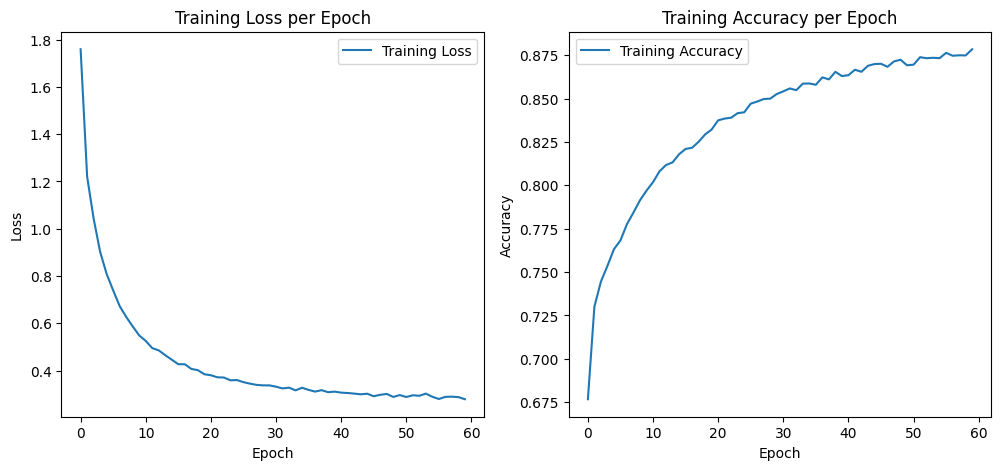

In [45]:
# Plotting the results
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(epoch_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epoch_accuracies, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy per Epoch')
plt.legend()

plt.show()


In [41]:
# Set the model to evaluation mode
model.eval()  
total_correct = 0
total_samples = 0

# Initialize lists to store predictions and labels for metrics if needed
all_predictions = []
all_labels = []

# Disable gradient calculation
with torch.no_grad():
    for batch in tqdm(test_loader, desc="Evaluating"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        
        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        
        # Get predictions
        predictions = torch.argmax(logits, dim=1)
        
        # Store predictions and labels
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        
        # Count correct predictions
        total_correct += (predictions == labels).sum().item()
        total_samples += labels.size(0)

# Calculate accuracy
accuracy = total_correct / total_samples
print(f"Test Accuracy: {accuracy:.4f}")

# Optional: If you want to compute and print other metrics like F1 score
from sklearn.metrics import classification_report

print(classification_report(all_labels, all_predictions))


Evaluating: 100%|██████████| 5465/5465 [01:05<00:00, 83.98it/s]


Test Accuracy: 0.7537
              precision    recall  f1-score   support

           0       0.65      0.88      0.74       487
           1       0.86      0.79      0.82      3990
           2       0.08      0.29      0.12        17
           3       0.71      0.86      0.78      1932
           4       0.71      0.71      0.71      1446
           5       0.72      0.86      0.78      1049
           6       0.85      0.95      0.90      1637
           7       0.84      0.83      0.84      3655
           8       0.82      0.79      0.80      1583
           9       0.81      0.90      0.85      2660
          10       0.47      0.71      0.57      1463
          11       0.20      0.38      0.26       354
          12       0.38      0.50      0.43      1001
          13       0.33      0.48      0.39       256
          14       0.50      0.80      0.62       110
          15       0.54      0.57      0.56       772
          16       0.68      0.80      0.73      2898
     

In [104]:
model.config

DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8",
    "9": "LABEL_9",
    "10": "LABEL_10",
    "11": "LABEL_11",
    "12": "LABEL_12",
    "13": "LABEL_13",
    "14": "LABEL_14",
    "15": "LABEL_15",
    "16": "LABEL_16",
    "17": "LABEL_17",
    "18": "LABEL_18",
    "19": "LABEL_19",
    "20": "LABEL_20",
    "21": "LABEL_21",
    "22": "LABEL_22",
    "23": "LABEL_23",
    "24": "LABEL_24",
    "25": "LABEL_25",
    "26": "LABEL_26",
    "27": "LABEL_27",
    "28": "LABEL_28",
    "29": "LABEL_29",
    "30": "LABEL_30",
    "31": "LABEL_31",
    "32": "LABEL_32",
    "33": "LABEL_33",
    "34": "LABEL_34",
    "35":